# Machine Learning

Information that helped me with machine learning. (Not a comprehensive tutorial.)

## Step 1. Developing in Python

### VS Code

* Text editor, not an IDE.

* Marketplace of extensions that provide language-specific behavior.

### Python

* Interpreted language for data scientists. Slow but very flexible. Perfect for torturing actual software developers.

* "Virtual environments" instead of projects, using `pip` to manage packages.

### Jupyter

* Code + markdown = executable documentation.

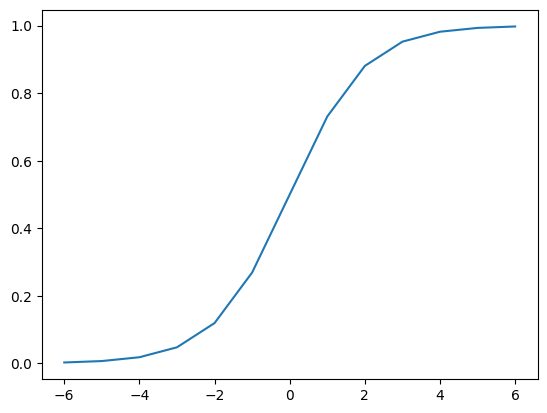

In [1]:
import math
import matplotlib.pyplot as plt

x = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
y = [1/(1+math.exp(-z)) for z in x]   # sigmoid function

plt.plot(x, y)
plt.show()

![](https://www.gstatic.com/education/formulas2/553212783/en/sigmoid_function.svg)

## Step 2. PyTorch

* Open source machine learning framework from Meta.

* Becoming more popular than Google's Tensorflow.

* Can run on either CPU (slow) or GPU (fast, called "CUDA").

In [2]:
import torch

print(torch.__version__)

2.0.1+cpu


## Step 3. Tensors

**A tensor is an N-dimensional array.**

<img src="https://miro.medium.com/1*6Z892ClZGon03_Mawj4Pew.png" width="400"/>

### 0-dimensional tensor

Also known as a scalar. Here we create a tensor from a single numeric value:

In [3]:
ndim0 = torch.tensor(3.1415)
print(ndim0)

tensor(3.1415)


### 1-dimensional tensor

Also known as a vector. We can create a tensor from a Python list:

In [4]:
ndim1 = torch.tensor([1, 2, 4, 8, 16, 32])
print(ndim1)

tensor([ 1,  2,  4,  8, 16, 32])


(Note: A vector can also be considered as a position in N-dimensional space. Both interpretations are valid, but don't get them mixed up.)

### 2-dimensional tensor

Also known as a matrix, which is essentially a table of rows and columns. Here, we generate a 1D tensor of 12 integers, and then change its shape:

In [5]:
ndim1 = torch.arange(0, 12)
ndim2 = ndim1.view(3, 4)   # 3 rows by 4 columns
print(ndim2)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Note that ranges in Python are [inclusive, exclusive).

We can modify the data in the tensor:

In [6]:
ndim2[1,0] = -100
print(ndim2)

tensor([[   0,    1,    2,    3],
        [-100,    5,    6,    7],
        [   8,    9,   10,   11]])


Note that the view shares its data with the original tensor:

In [7]:
print(ndim1)

tensor([   0,    1,    2,    3, -100,    5,    6,    7,    8,    9,   10,   11])


We can also transpose a tensor's rows and columns:

In [8]:
print(ndim2.transpose(0, 1))   # transpose dim-0 and dim-1

tensor([[   0, -100,    8],
        [   1,    5,    9],
        [   2,    6,   10],
        [   3,    7,   11]])


### 3-dimensional tensor

In [9]:
ndim3 = torch.rand(2, 3, 4)   # 2 layers X 3 rows X 4 columns
print(ndim3)

tensor([[[0.5235, 0.3274, 0.9909, 0.2231],
         [0.1098, 0.2298, 0.8244, 0.4353],
         [0.4916, 0.0195, 0.7341, 0.1055]],

        [[0.7233, 0.7047, 0.6161, 0.5416],
         [0.4174, 0.1489, 0.4661, 0.1818],
         [0.1019, 0.2944, 0.1986, 0.0146]]])


### Higher dimensions

It gets harder to visualize tensors as the number of dimensions increases:

In [10]:
ndim4 = torch.rand(2, 3, 2, 3)   # 2 hyperlayers X 3 layers X 2 rows X 3 columns
print(ndim4)

tensor([[[[0.5941, 0.2134, 0.1130],
          [0.3746, 0.8971, 0.0919]],

         [[0.4769, 0.0918, 0.6942],
          [0.9842, 0.7814, 0.0113]],

         [[0.8415, 0.6162, 0.2691],
          [0.5772, 0.0108, 0.0025]]],


        [[[0.9583, 0.7943, 0.9134],
          [0.1596, 0.6065, 0.0706]],

         [[0.3295, 0.2698, 0.2155],
          [0.0912, 0.0487, 0.1229]],

         [[0.0385, 0.9917, 0.3463],
          [0.6754, 0.0671, 0.3843]]]])


### Changing dimensionality

Start with a 1D vector:

In [11]:
vector = torch.arange(-4, 5)   # 1D: 9 columns
print(vector)
print(vector.shape)

tensor([-4, -3, -2, -1,  0,  1,  2,  3,  4])
torch.Size([9])


If we insert a dimension of size 1 in front, the columns stay columns:

In [12]:
unsq0 = vector.unsqueeze(0)   # 2D: 1 row x 9 columns
print(unsq0)
print(unsq0.shape)

tensor([[-4, -3, -2, -1,  0,  1,  2,  3,  4]])
torch.Size([1, 9])


If we insert a dimension of size 1 at the end, the columns become rows:

In [13]:
unsq1 = vector.unsqueeze(1)   # 2D: 9 rows x 1 column
print(unsq1)
print(unsq1.shape)

tensor([[-4],
        [-3],
        [-2],
        [-1],
        [ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]])
torch.Size([9, 1])


## Step 4. Neural network building blocks

Some examples from the "nn" zoo:

In [14]:
import torch.nn as nn

* In general, these are functions of type `Tensor -> Tensor`, so a complex neural network can be built by composition.

* During training, the model learns the best values for the parameters inside these blocks.

### Linear layer

Applies a linear transformation: y = xW<sup>T</sup> + B

Where:
* x is the input tensor
* y is the output tensor
* W is a 2D tensor of weight parameters
* B is a 1D tensor of bias parameters
* xW<sup>T</sup> is matrix multiplication of x by the transpose of W.

In [15]:
linear = nn.Linear(in_features=20, out_features=30)
print("Weight:", linear.weight.shape)
print("Bias:", linear.bias.shape)
print("Total # of parms:", sum(parm.numel() for parm in linear.parameters()))   # (30 x 20) + 30

Weight: torch.Size([30, 20])
Bias: torch.Size([30])
Total # of parms: 630


Linear transforms are useful for "projecting" a tensor into a different shape with the same number of dimensions:

In [16]:
x = torch.rand(5, 6, 20)   # last dimension must match linear input
print("Input:", x.shape)
y = linear(x)              # result is still 3D, but now with 30 columns
print("Output:", y.shape)

Input: torch.Size([5, 6, 20])
Output: torch.Size([5, 6, 30])


### Dropout layer

Randomly sets some of the input to zero during training (and the remaining elements are scaled up proportionally). Dropout prevents the model from becoming too reliant on a small set of parameters.

A dropout layer has no parameters, but its dropout rate (e.g. 20%) is a hyperparameter.

In [17]:
dropout = nn.Dropout(0.2)

x = torch.ones(3, 4)
print(x)
y = dropout(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.2500, 0.0000, 1.2500, 1.2500],
        [1.2500, 1.2500, 0.0000, 1.2500],
        [1.2500, 1.2500, 0.0000, 1.2500]])


The dropout is recomputed during each application, so results are not deterministic:

In [18]:
y = dropout(x)
print(y)

tensor([[1.2500, 1.2500, 0.0000, 0.0000],
        [1.2500, 1.2500, 1.2500, 1.2500],
        [1.2500, 1.2500, 1.2500, 1.2500]])


### Layer normalization

Normalizes input around its mean and standard deviation. This reduces training time by reigning in large values.

In [19]:
numColumns = 4
norm = nn.LayerNorm(numColumns)   # expect last dimension of this size

x = torch.arange(0.0, 12.0).view(-1, numColumns)   # -1: PyTorch infers the # of rows
print(x)
y = norm(x)
print(y)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416]],
       grad_fn=<NativeLayerNormBackward0>)


The normalization can have weight and bias parameters that the model learns during training:

In [20]:
print("Weight:", norm.weight)
print("Bias:", norm.bias)

Weight: Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)
Bias: Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)


### Embedding

asdf

### Activation

asdf

## Building a model

### Non-linear regression

First, define a simple non-linear function that we want a neural network to learn. (This is like using a nucelar bomb to kill an ant, but it illustrates the basic principle well.)

In [99]:
def targetFunc(x):
    return 2 * x * x + 10

We also need some training data, consisting of a tensor of inputs and a tensor of (correct) outputs:

In [100]:
domain = 6.0
xBatch = torch.arange(-domain, domain+1).unsqueeze(1)
yTarget = targetFunc(xBatch)
print("Input:\n", xBatch)
print("Output:\n", yTarget)

Input:
 tensor([[-6.],
        [-5.],
        [-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.]])
Output:
 tensor([[82.],
        [60.],
        [42.],
        [28.],
        [18.],
        [12.],
        [10.],
        [12.],
        [18.],
        [28.],
        [42.],
        [60.],
        [82.]])


The target function is a parabola:

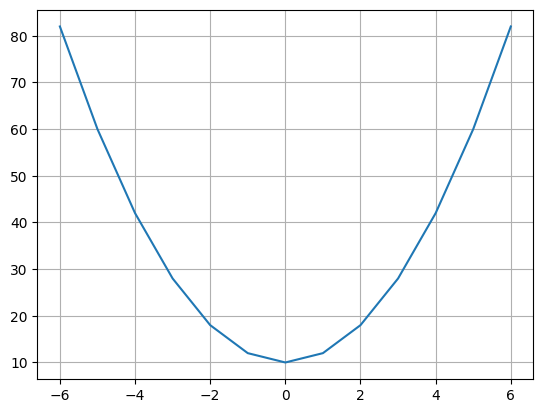

In [101]:
plt.plot(xBatch, yTarget)
plt.grid()
plt.show()

Now define the model, which consists of a non-linear layer sandwhiched between two linear layers. Since the target function is R -> R, the model must have a single input value and a single output value. The model's parameters are initialized with random values.

In [102]:
model = nn.Sequential(
    nn.Linear(1, 10, bias = True),
    nn.ReLU(),
    nn.Linear(10, 1, bias = True))
for (name, parm) in model.named_parameters():
    print("{}: {}".format(name, parm.data))

0.weight: tensor([[-0.9697],
        [ 0.4468],
        [ 0.8093],
        [-0.2042],
        [ 0.1029],
        [ 0.3238],
        [ 0.0922],
        [ 0.4948],
        [ 0.3412],
        [ 0.1123]])
0.bias: tensor([ 0.7000,  0.3729,  0.1739,  0.1597,  0.6899,  0.0087,  0.3506, -0.7332,
         0.0888, -0.4285])
2.weight: tensor([[ 0.1487,  0.2436, -0.1449, -0.1298, -0.0866, -0.1892, -0.0952, -0.1623,
          0.3126,  0.3015]])
2.bias: tensor([-0.1888])


To train the model, we need:
* A loss function that determines how far off target the model is, and
* An optimizer that will attempt to minimize the loss. The optimizer's "learning rate" determines how much of an adjustment it will make to the model's parameters on each pass.

In [103]:
lossFunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

Now, we're ready to train the model. On each iteration:

1. Make a forward pass to generate a batch of predicted values.
2. Calculate the loss, which corresponds to the difference between the predicted and target values.
3. Make a backward pass to calculate gradients from the loss, which are the directions in which each parameter much be adjusted.
4. Adjust each parameter by a small amount accordingly.

Epoch 0, loss 2.6053311824798584


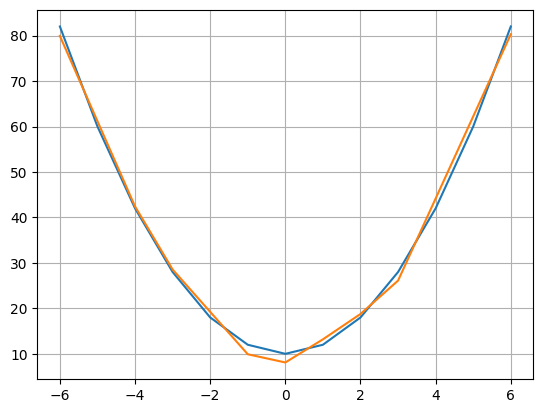

Epoch 1, loss 2.5861849784851074


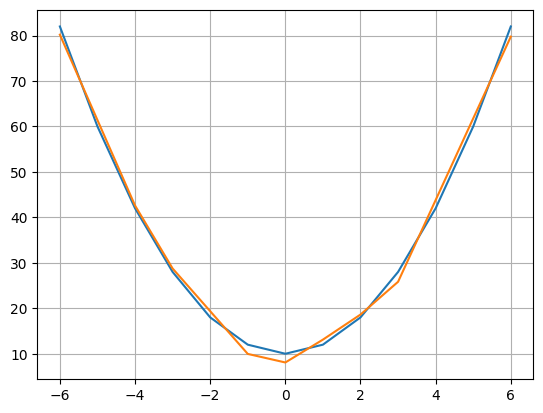

Epoch 2, loss 2.5774965286254883


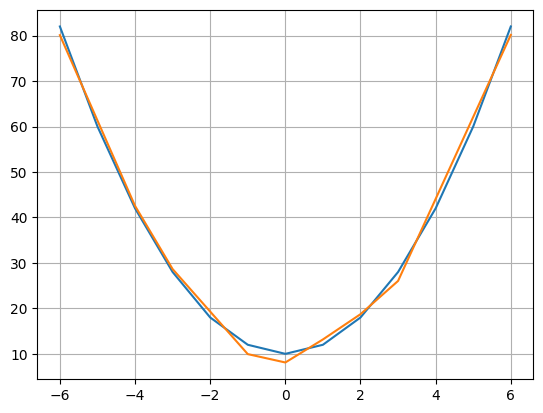

Epoch 4, loss 2.6064188480377197


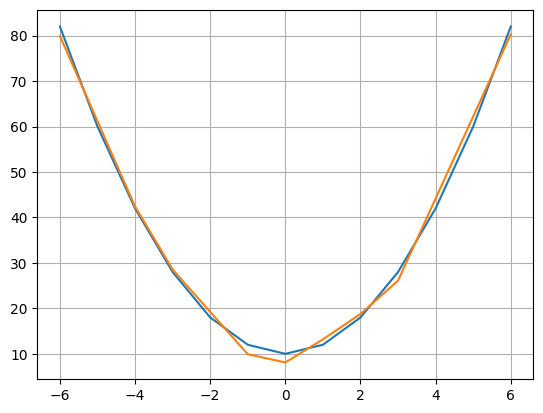

Epoch 8, loss 2.6067793369293213


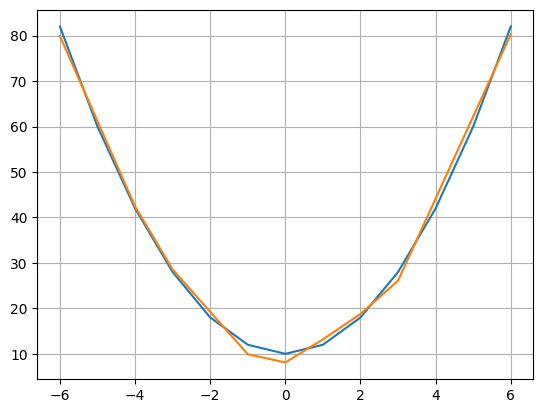

Epoch 16, loss 2.5694937705993652


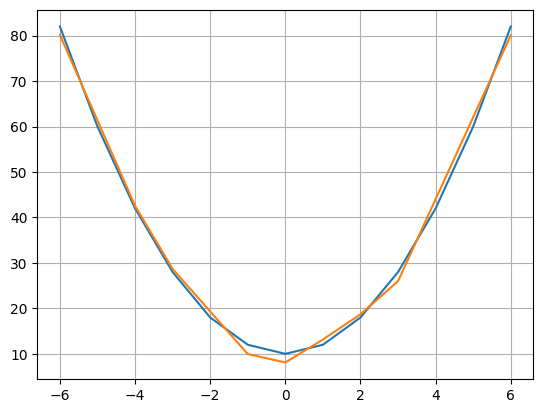

Epoch 32, loss 2.5741705894470215


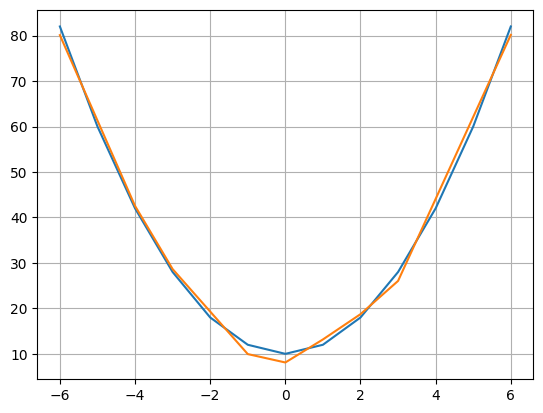

Epoch 64, loss 2.566673517227173


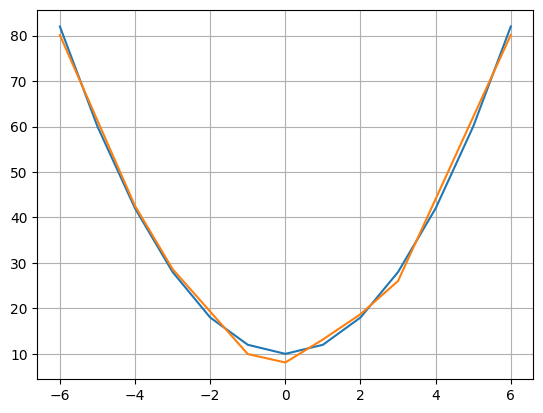

Epoch 128, loss 2.5832159519195557


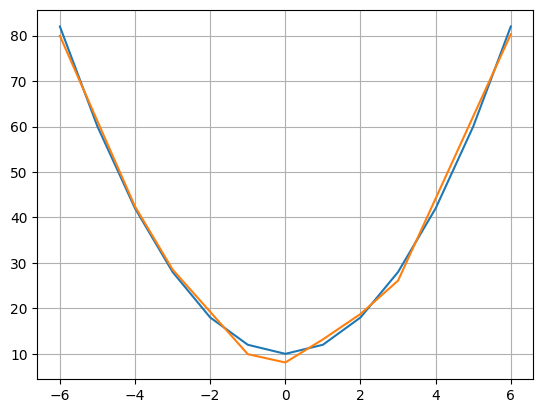

Epoch 256, loss 2.535766839981079


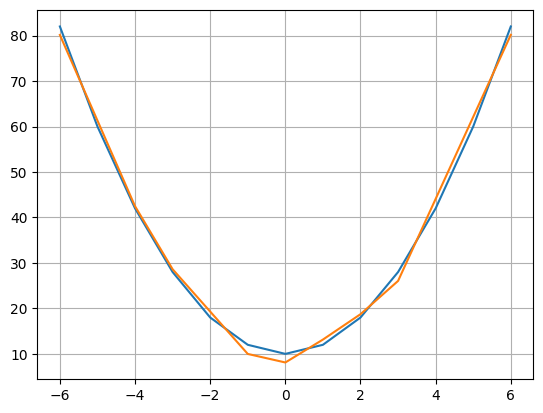

Epoch 512, loss 2.5223276615142822


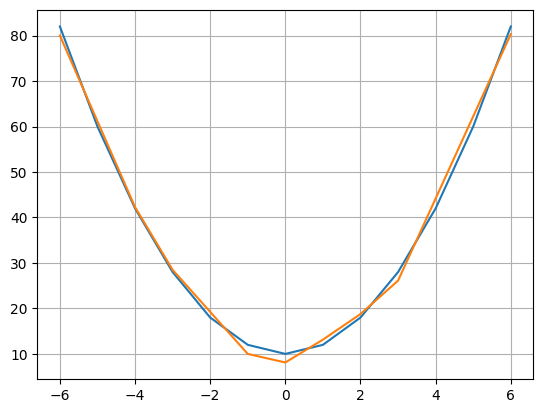

Epoch 1024, loss 2.454143524169922


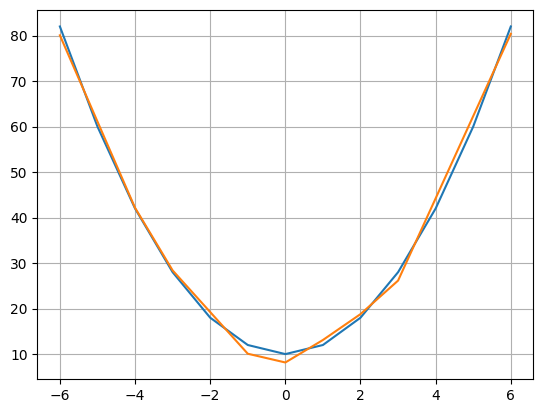

Epoch 2048, loss 2.2828829288482666


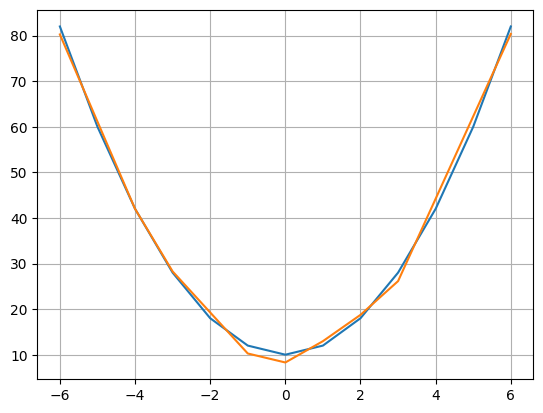

Epoch 4096, loss 1.9702829122543335


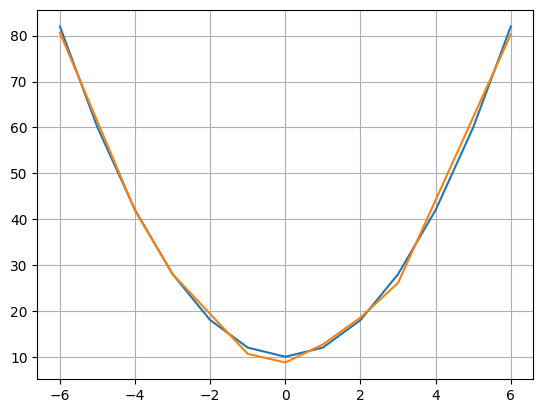

Epoch 8192, loss 1.941367506980896


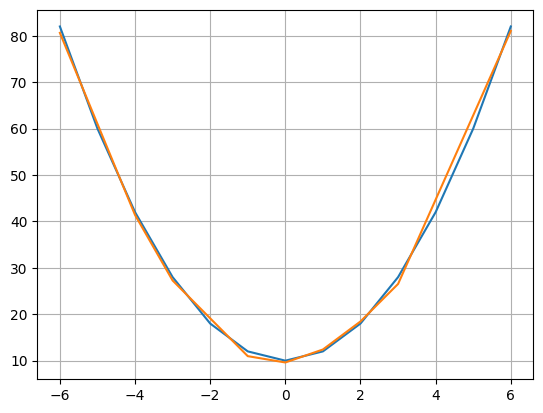

Epoch 16384, loss 1.8017653226852417


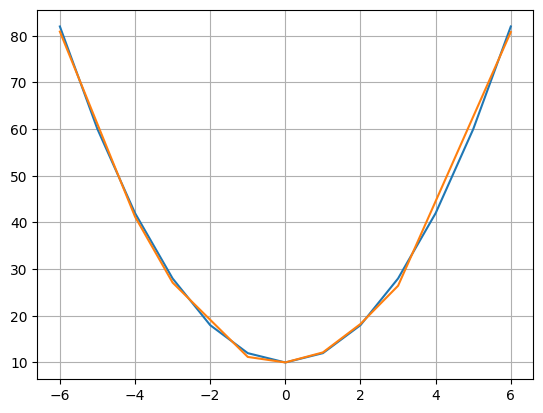

In [106]:
for epoch in range(20000):

    # forward pass
    yPrediction = model(xBatch)

    # calculate loss
    loss = lossFunc(yPrediction, yTarget)
    if (epoch & (epoch-1) == 0):   # check for power of 2
        print("Epoch {}, loss {}".format(epoch, loss))
        with torch.no_grad():
            plt.plot(xBatch, yTarget)
            plt.plot(xBatch, yPrediction)
        plt.grid()
        plt.show()

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # adjust parameters
    optimizer.step()

The model has learned parameter values that approximate the target function well.

In [105]:
for (name, parm) in model.named_parameters() :
    print("{}: {}".format(name, parm.data))

0.weight: tensor([[-3.6397],
        [ 1.0934],
        [ 0.8178],
        [-0.5973],
        [ 0.7965],
        [ 0.3936],
        [ 0.2385],
        [ 1.3938],
        [ 0.8321],
        [ 1.4406]])
0.bias: tensor([-1.8968,  3.8505,  2.8659,  0.5976,  4.8244, -1.0552,  0.8265, -3.9691,
         2.9325, -4.1507])
2.weight: tensor([[ 3.9590,  3.9717,  2.8894,  0.8194, -4.8294,  1.1009,  0.7888,  4.1171,
          3.0436,  4.3784]])
2.bias: tensor([-2.2428])
